In [1]:
import pandas as pd

df = pd.read_csv("../data/creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.shape 

(284807, 31)

In [3]:
df["Class"].value_counts(normalize=True)


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

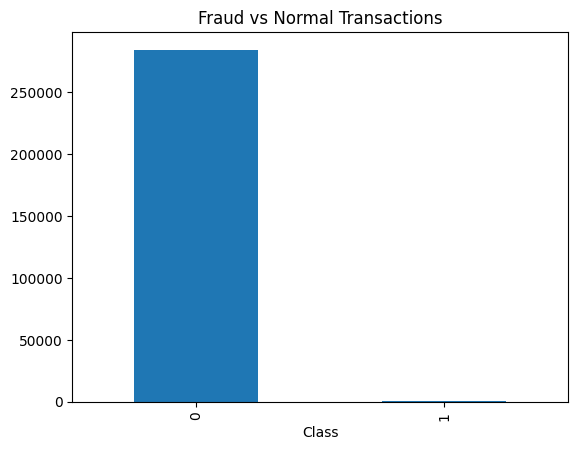

In [4]:
import matplotlib.pyplot as plt

df["Class"].value_counts().plot(kind="bar")
plt.title("Fraud vs Normal Transactions")
plt.show()


In [5]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
preds = dummy.predict(X_test)

accuracy_score(y_test, preds)


0.9982795547909132

## Key Observations

- The dataset is extremely imbalanced (~0.17% fraud).
- Accuracy is misleading and unsuitable for fraud detection.
- Precision, Recall, PR-AUC, and threshold-based metrics are required.
- This motivates a risk-aware decision system rather than naive classifiers.


In [6]:
df.iloc[0].drop("Class").tolist()

[0.0,
 -1.3598071336738,
 -0.0727811733098497,
 2.53634673796914,
 1.37815522427443,
 -0.338320769942518,
 0.462387777762292,
 0.239598554061257,
 0.0986979012610507,
 0.363786969611213,
 0.0907941719789316,
 -0.551599533260813,
 -0.617800855762348,
 -0.991389847235408,
 -0.311169353699879,
 1.46817697209427,
 -0.470400525259478,
 0.207971241929242,
 0.0257905801985591,
 0.403992960255733,
 0.251412098239705,
 -0.018306777944153,
 0.277837575558899,
 -0.110473910188767,
 0.0669280749146731,
 0.128539358273528,
 -0.189114843888824,
 0.133558376740387,
 -0.0210530534538215,
 149.62]

In [8]:


fraud_rows = df[df["Class"] == 1]

fraud_sample = fraud_rows.iloc[0]

features = fraud_sample.drop("Class").values.tolist()

print(features)


[406.0, -2.3122265423263, 1.95199201064158, -1.60985073229769, 3.9979055875468, -0.522187864667764, -1.42654531920595, -2.53738730624579, 1.39165724829804, -2.77008927719433, -2.77227214465915, 3.20203320709635, -2.89990738849473, -0.595221881324605, -4.28925378244217, 0.389724120274487, -1.14074717980657, -2.83005567450437, -0.0168224681808257, 0.416955705037907, 0.126910559061474, 0.517232370861764, -0.0350493686052974, -0.465211076182388, 0.320198198514526, 0.0445191674731724, 0.177839798284401, 0.261145002567677, -0.143275874698919, 0.0]
